In [10]:
import tsmd_evaluation.prom as prom

import loconsensus.loconsensus as loconsensus
import locomotif.locomotif as locomotif

from experiment import ExperimentConfig, ExperimentOneGenerator

import  numpy as np
import matplotlib.pyplot as plt

import time

In [11]:
np.random.seed(11)

config = ExperimentConfig()
gen = ExperimentOneGenerator(config)

ts_list, m_pos, m, wm = gen.generate_experiment()

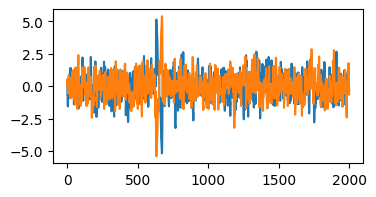

In [12]:
plt.figure(figsize=(4,2))
plt.plot(ts_list[0])
plt.show()

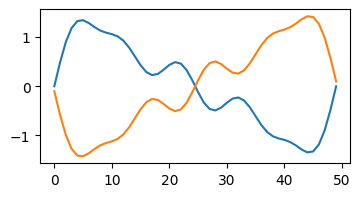

In [13]:
plt.figure(figsize=(4,2))
for d in range(config.n_dims):
    plt.plot(m[:,d])
plt.show()

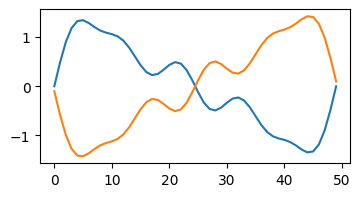

In [14]:
plt.figure(figsize=(4,2))
for d in range(config.n_dims):
    plt.plot(wm[:,d])
plt.show()

In [15]:
concat_list = np.concatenate(ts_list, axis=0)
l_min = 25
l_max = 75
rho = 0.8
nb = None

start_time = time.perf_counter()
motifs1 = loconsensus.apply_loconsensus(ts_list, l_min, l_max, rho, nb)
end_time = time.perf_counter() - start_time
print(f'{end_time:.2f}')

start_time = time.perf_counter()
motifs2 = locomotif.apply_locomotif(concat_list, l_min, l_max, rho, nb)
end_time = time.perf_counter() - start_time
print(f'{end_time:.2f}')

22.06
40.56


In [16]:
M, _, _ = prom.matching_matrix([m_pos], [motif_set[1] for motif_set in motifs1])
print(M)
print()
print("Micro averaged PROM")
print(f"Precision: {prom.micro_averaged_precision(M)}")
print(f"Recall: {prom.micro_averaged_recall(M)}")
print(f"F1-score: {prom.micro_averaged_f1(M)}")

[[ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 40. 26. 18. 10. 10.  8. 10.  7.  6.  4.  6.  6.  5.  4.  5.  5.  2.
   4.  5.  3.  4.  3.  2.  4.  4.  4.  3.  4.  3.  3.  3.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. nan]]

Micro averaged PROM
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [18]:
M, _, _ = prom.matching_matrix([m_pos], [motif_set[1] for motif_set in motifs2])
print(M)
print()
print("Micro averaged PROM")
print(f"Precision: {prom.micro_averaged_precision(M)}")
print(f"Recall: {prom.micro_averaged_recall(M)}")
print(f"F1-score: {prom.micro_averaged_f1(M)}")

[[ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 37. 24. 18. 14. 15.  9.  8.  8.  7.  7.  6.  6.  5.  5.  5.  4.  4.
   4.  4.  3.  3.  3.  3.  3.  3.  3.  3.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2. nan]]

Micro averaged PROM
Precision: 1.0
Recall: 1.0
F1-score: 1.0
